# สร้าง buffer และคำนวณจุดสถานีที่ตกใน buffer เพื่อนำไปใช้สร้าง MFB ปรับแก้เรดาร์ก่อนโมเสค
* สร้าง buffer สถานีเรดาร์ 240 km
* คำนวณจำนวนสถานีฝนในพื้นที่เรดาร์ ส่งออกเป็น csv และ shapefile
* สร้างแผนที่ใหญ่และจำนวนสถานีฝนในแต่ละเรดาร์ เซฟเป็น png

C:\Users\Admin\AppData\Local\Temp\ipykernel_4336\1804366061.py:76: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gauges_in_buffer.to_file(os.path.join(gauge_buffer_dir, f"{buffer_name}_gauges.shp"))
C:\Users\Admin\AppData\Local\Temp\ipykernel_4336\1804366061.py:76: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gauges_in_buffer.to_file(os.path.join(gauge_buffer_dir, f"{buffer_name}_gauges.shp"))
C:\Users\Admin\AppData\Local\Temp\ipykernel_4336\1804366061.py:76: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gauges_in_buffer.to_file(os.path.join(gauge_buffer_dir, f"{buffer_name}_gauges.shp"))
C:\Users\Admin\AppData\Local\Temp\ipykernel_4336\1804366061.py:76: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gauges_in_buffer.to_file(os.path.join(gauge_buffer_dir, f"{buffer_

IndexError: index 3 is out of bounds for axis 0 with size 3

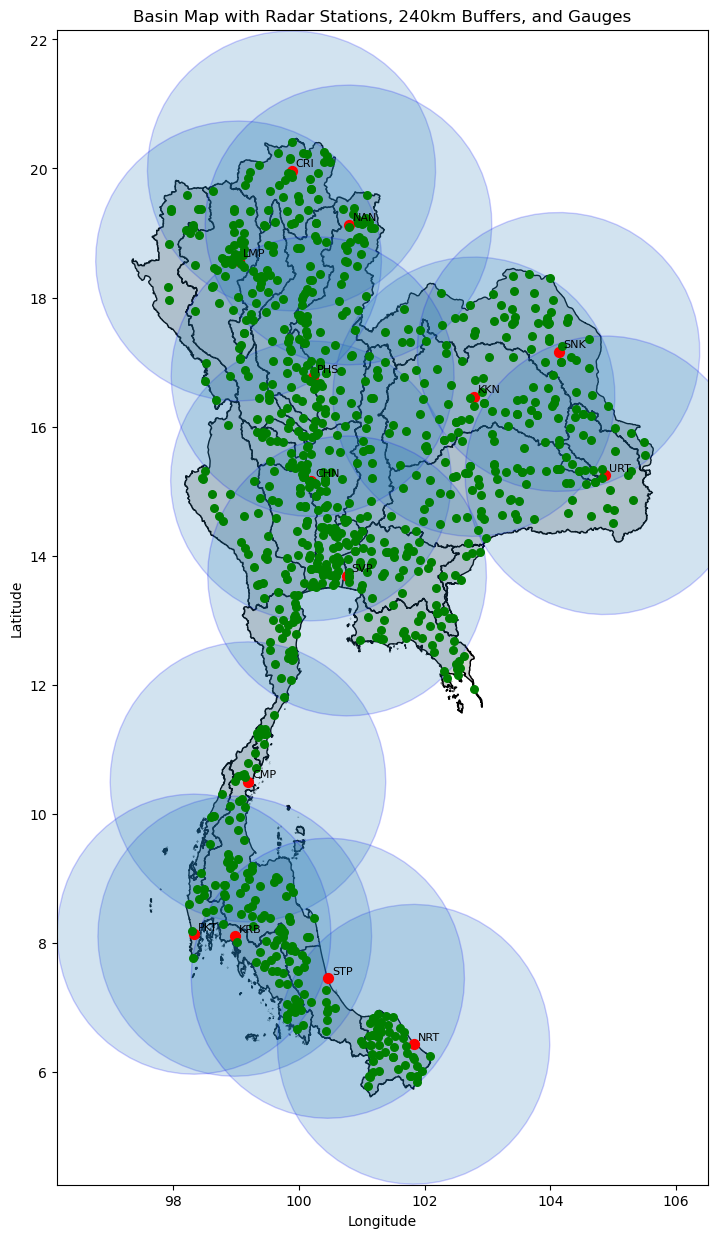

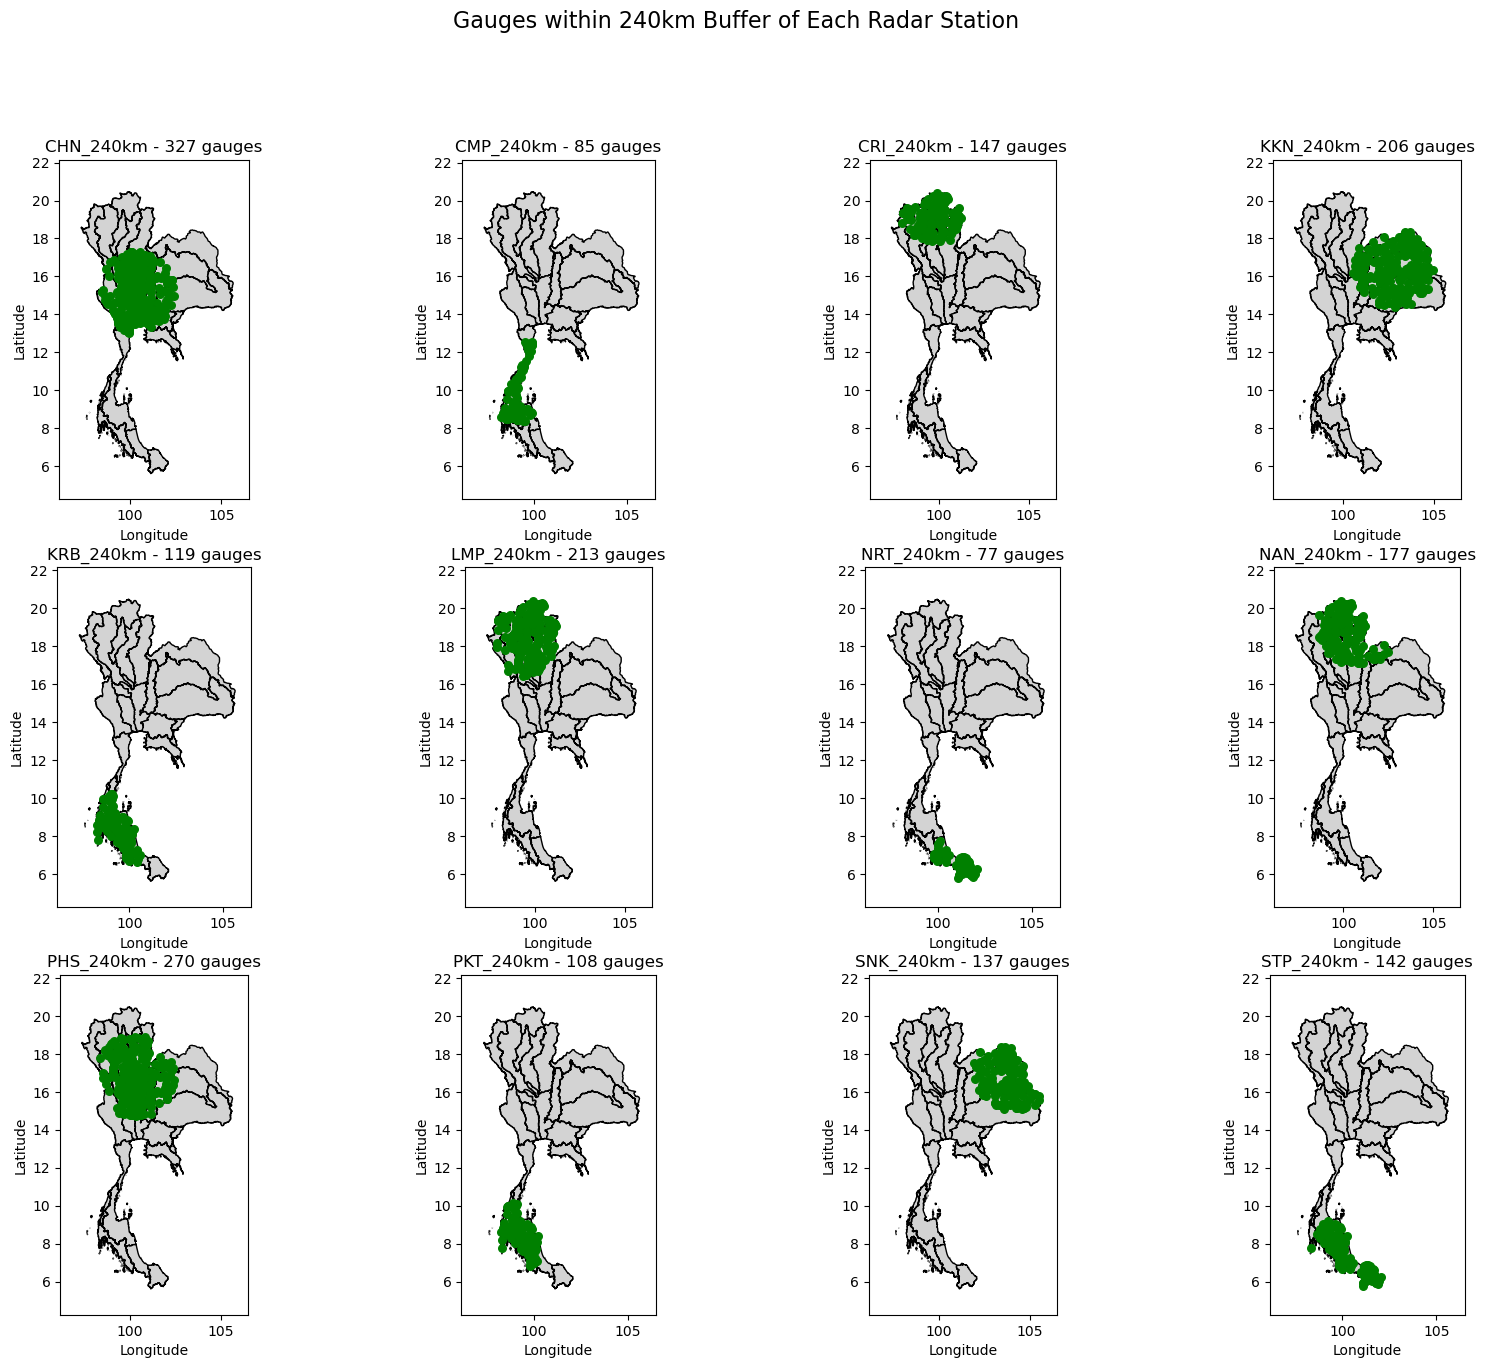

In [1]:
'''
2024.09.22
โค้ดนี้พัฒนาโดย รองศาสตราจารย์ ดร. นัฐพล มหาวิค ภาควิชาทรัพยากรธรรมชาติและสิ่งแวดล้อม คณะเกษตรศาสตร์ฯ มหาวิทยาลัยนเรศวร 
ในงานวิจัย เรื่อง "การวิจัยและพัฒนาผลิตภัณฑ์โมเสคฝนประมาณค่าจากเรดาร์ตรวจอากาศในพื้นที่ระดับลุ่มน้ำของประเทศไทยด้วยเทคโนโลยีภูมิสารสนเทศรหัสเปิด"
สนับสนุนทุนวิจัยโดยสํานักงานการวิจัยแห่งชาติ (วช.)  แผนงานการวิจัยและนวัตกรรมแผนงานด้านการบริหารจัดการภัยพิบัติทางธรรมชาติ 
ประจำปีงบประมาณ 2566  ตามสัญญา เลขที่ N25A660467 ผู้นำโค้ดนี้ไปใช้หรือดัดแปลงควรอ้างอิงงานวิจัยชิ้นนี้ตามหลักเกณฑ์การอ้างอิงสากล
เรียนหลักการเรดาร์และภูมิสารสนเทศ ที่ https://www.youtube.com/@Nattapon_Mahavik/playlists
หนังสือเรดาร์ตรวจอากาศทางอุตุนิยมวิทยา สำนักพิมพ์จุฬาฯ : https://www.chulabook.com/education/144567
หนังสือออนไลน์เรดาร์ตรวจอากาศทางอุตุนิยมวิทยา สำนักพิมพ์จุฬาฯ : https://www.chulabook.com/education/205129
ติดต่อ nattaponm@nu.ac.th
'''
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import os

# Read the basin shapefile
basin_shapefile = '../1data/1GIS/0base_map_gis/MainBasin_ONWR_Law_WGS84Geo.shp'
basin = gpd.read_file(basin_shapefile)

# Read the gauge CSV file
gauge_csv = '../1data/3Gagues/station_metadata_haii_geographic.csv'
gauges_df = pd.read_csv(gauge_csv)

# Create a GeoDataFrame from the gauge CSV
gauge_geometry = [Point(xy) for xy in zip(gauges_df['long'], gauges_df['lat'])]
gauges = gpd.GeoDataFrame(gauges_df, geometry=gauge_geometry, crs="EPSG:4326")

# Create a GeoDataFrame from the radar stations
radar_data = {
        "CHN": {'coords': (100.191263, 15.157852, 40.0), 'el': 0.5},
        "CMP": {'coords': (99.188203, 10.493099, 32.0), 'el': 0.0},
        "CRI": {'coords': (99.881593, 19.961471, 444.0), 'el': 1.08},
        "KKN": {'coords': (102.785881, 16.4625, 217.0), 'el': 0.42},
        "KRB": {'coords': (98.97806, 8.101389, 52.0), 'el': 0.8},
        "LMP": {'coords': (99.038728, 18.566602, 328.0), 'el': 1.67},
        "NRT": {'coords': (101.825165, 6.426888, 33.0), 'el': 0.5},
        "NAN": {'coords': (100.788902, 19.124102, 260.0), 'el': 1.41},
        "PHS": {'coords': (100.217964, 16.775408, 72.0), 'el': 0.5},
        "PKT": {'coords': (98.329462, 8.133407, 281.0), 'el': 0.02},
        "SNK": {'coords': (104.132591, 17.156363, 196.0), 'el': 0.42},
        "STP": {'coords': (100.459996, 7.449996, 33.0), 'el': 0.5},
        "SVP": {'coords': (100.766541, 13.684727, 39.0), 'el': 1.5},
        "URT": {'coords': (104.870004, 15.245, 157.0), 'el': 0.41},
    }   

radar_gdf = gpd.GeoDataFrame(
    data={"name": list(radar_data.keys())},
    geometry=[Point(data['coords'][:2]) for data in radar_data.values()],
    crs="EPSG:4326"
)

# Create buffers (240 km) for each radar station in UTM47N
radar_gdf_utm = radar_gdf.to_crs("EPSG:32647")  # UTM47N
radar_buffers = radar_gdf_utm.buffer(240000)  # 240 km in meters
radar_buffers = radar_buffers.to_crs("EPSG:4326")  # Convert back to WGS84

# Create a new GeoDataFrame with the buffers
buffer_gdf = gpd.GeoDataFrame(
    data={"name": [f"{name}_240km" for name in radar_data.keys()]},
    geometry=radar_buffers,
    crs="EPSG:4326"
)

# Create output directories if they don't exist
output_dir = './0Zprocessing_data'  # เข้าไปตรวจดูผลแผนที่ได้
buffer_dir = os.path.join(output_dir, '0shape_buffers')
gauge_buffer_dir = os.path.join(output_dir, '0guage_in_buffer240km')
os.makedirs(output_dir, exist_ok=True)
os.makedirs(buffer_dir, exist_ok=True)
os.makedirs(gauge_buffer_dir, exist_ok=True)

# Save buffers as shapefiles and find gauges within each buffer
gauges_in_buffers = {}
for idx, row in buffer_gdf.iterrows():
    buffer_name = f"stations_{row['name']}"
    buffer_gdf[buffer_gdf['name'] == row['name']].to_file(
        os.path.join(buffer_dir, f"{buffer_name}.shp")
    )
    
    # Find gauges within the buffer
    gauges_in_buffer = gauges[gauges.intersects(row['geometry'])]
    gauges_in_buffers[row['name']] = gauges_in_buffer
    
    # Save gauges within buffer as shapefile and CSV
    gauges_in_buffer.to_file(os.path.join(gauge_buffer_dir, f"{buffer_name}_gauges.shp"))
    gauges_in_buffer.to_csv(os.path.join(gauge_buffer_dir, f"{buffer_name}_gauges.csv"), index=False)

# Plot the main map
fig, ax = plt.subplots(figsize=(15, 15))

basin.plot(ax=ax, color='lightgrey', edgecolor='black')
buffer_gdf.plot(ax=ax, alpha=0.2, edgecolor='blue')
radar_gdf.plot(ax=ax, color='red', markersize=50)
gauges.plot(ax=ax, color='green', markersize=30)

for idx, row in radar_gdf.iterrows():
    ax.annotate(row['name'], xy=row['geometry'].coords[0], xytext=(3, 3), 
                textcoords="offset points", fontsize=8)

ax.set_xlim(96.15, 106.5)
ax.set_ylim(4.25, 22.15)
plt.title("Basin Map with Radar Stations, 240km Buffers, and Gauges")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.savefig(os.path.join(output_dir, 'radar_basin_gauge_map.png'), dpi=300, bbox_inches='tight')

# Create 3x4 subplot for individual radar buffer maps
fig, axs = plt.subplots(3, 4, figsize=(20, 15)) # เปลี่ยนได้
fig.suptitle("Gauges within 240km Buffer of Each Radar Station", fontsize=16)

for idx, (radar_name, gauges_in_buffer) in enumerate(gauges_in_buffers.items()):
    row = idx // 4
    col = idx % 4
    ax = axs[row, col]
    
    basin.plot(ax=ax, color='lightgrey', edgecolor='black')
    buffer_gdf[buffer_gdf['name'] == f"{radar_name}_240km"].plot(ax=ax, alpha=0.2, edgecolor='blue')
    radar_gdf[radar_gdf['name'] == radar_name].plot(ax=ax, color='red', markersize=50)
    gauges_in_buffer.plot(ax=ax, color='green', markersize=30)
    
    ax.set_title(f"{radar_name} - {len(gauges_in_buffer)} gauges")
    ax.set_xlim(96.15, 106.5)
    ax.set_ylim(4.25, 22.15)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

plt.tight_layout()
plt.savefig(os.path.join(output_dir, './0Zprocessing_data/0map/radar_buffer_gauges_subplots.png'), dpi=300, bbox_inches='tight')

print("Main map and subplot map have been saved in the './Zprocessing_data' directory.")
print("Buffer shapefiles have been saved in the './Zprocessing_data/0shape_buffers' directory.")
print("Gauge shapefiles and CSVs for each buffer have been saved in the './Zprocessing_data/0guage_in_buffer240km' directory.")